# U.S. Medical Insurance Costs

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')
print(df.head())
#df.info()


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


    + Find out the average age of the patients in the dataset.
    + Analyze where a majority of the individuals are from.
    + Look at the different costs between smokers vs. non-smokers.
    + Figure out what the average age is for someone who has at least one child in this dataset.

   
    

Goals: 
       1. Analyze dataset of Medical Insurance Costs
       2. Find out the risk groups.
       3. Discover different groups of people that purchase insurance.
       

        

Finding out the average age of the patient: around 39 years old.

In [2]:
df['age'].mean()

39.20702541106129

Let's analyze distribution of medical insurance by age:

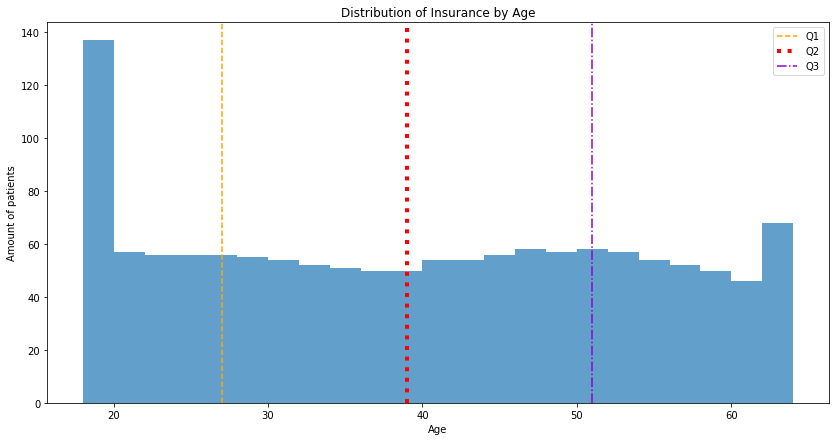

In [3]:
age_std = df['age'].std
age_quartiles = np.quantile(df['age'], [0.25, 0.5, 0.75])
f, ax = plt.subplots(figsize = (14, 7))
plt.hist(df['age'], bins = 23, range =(18, 64), rwidth = 1, alpha = 0.7)

plt.xlabel('Age')
plt.ylabel('Amount of patients')
plt.title('Distribution of Insurance by Age')
plt.axvline(age_quartiles[0], color = 'orange', ls = '--', label = 'Q1')
plt.axvline(age_quartiles[1], color = 'red', ls = ':', label = 'Q2', lw = 4)
plt.axvline(age_quartiles[2], color = 'darkviolet', ls = '-.', label = 'Q3')
plt.legend()


Lets analyze distribution by Age

Text(0.5, 1.0, 'Insurance by Sex')

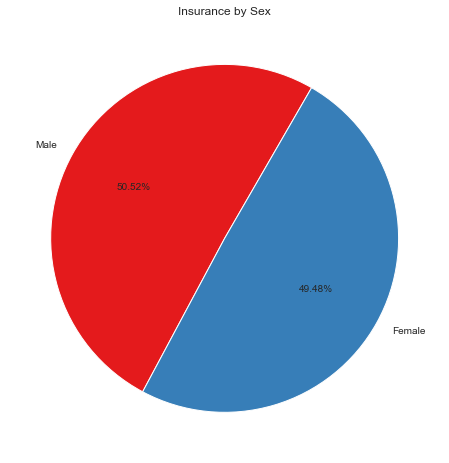

In [46]:
male = df[df['sex'] == 'male']['sex']
female = df[df['sex'] == 'female']['sex']
counts = [len(male), len(female)]
f, ax = plt.subplots(figsize = (10, 8))
ax.pie( counts, autopct="%0.2f%%", labels = ['Male', 'Female'], startangle=60)
plt.title('Insurance by Sex')


 Analyze where a majority of the individuals are from.
 

['southwest' 'southeast' 'northwest' 'northeast']
(325, 364, 325, 324)


Text(0.5, 1.0, 'Where are patiens from')

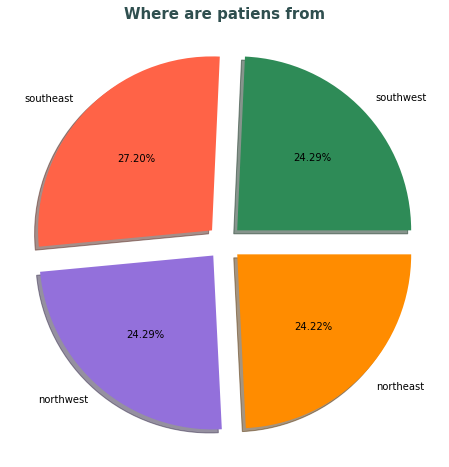

In [4]:
print(df.region.unique())
regions = (len(df[df['region'] == 'southwest']), len(df[df['region'] == 'southeast']), len(df[df['region'] == 'northwest']), len(df[df['region'] == 'northeast']))
print(regions)
explode = (0.1, 0.1, 0.1, 0.1)
colors = ['seagreen', 'tomato', 'mediumpurple', 'darkorange']
f, ax = plt.subplots(figsize = (8, 8))
ax.pie(regions, autopct="%0.2f%%", labels = ['southwest', 'southeast', 'northwest', 'northeast'], colors = colors, shadow = True, explode = explode)
plt.title('Where are patiens from', fontweight = 'bold', fontsize = '15', color = 'darkslategrey')

Look at the different costs between smokers vs. non-smokers.


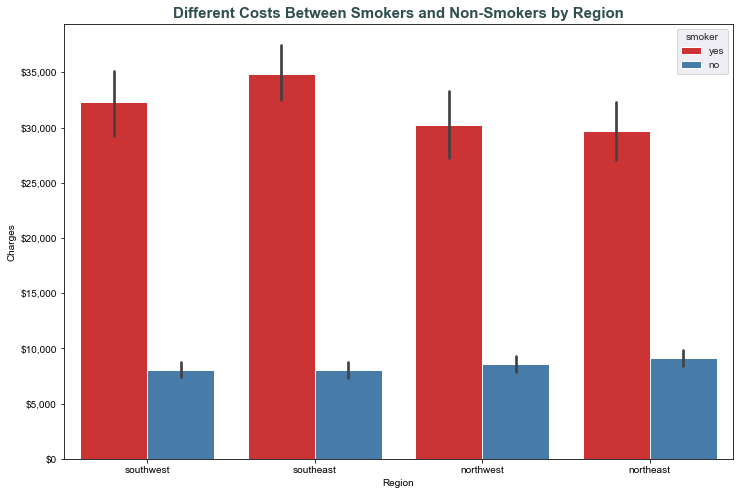

In [5]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(12, 8))
sns.set_palette('Set1')
sns.set_style('darkgrid')
sns.barplot(data=df, x='region', y = 'charges', hue = 'smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Different Costs Between Smokers and Non-Smokers by Region', fontweight = 'bold', fontsize = '15', color = 'darkslategrey')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Figure out what the average age is for someone who has at least one child in this dataset.

distribution in regions by gender

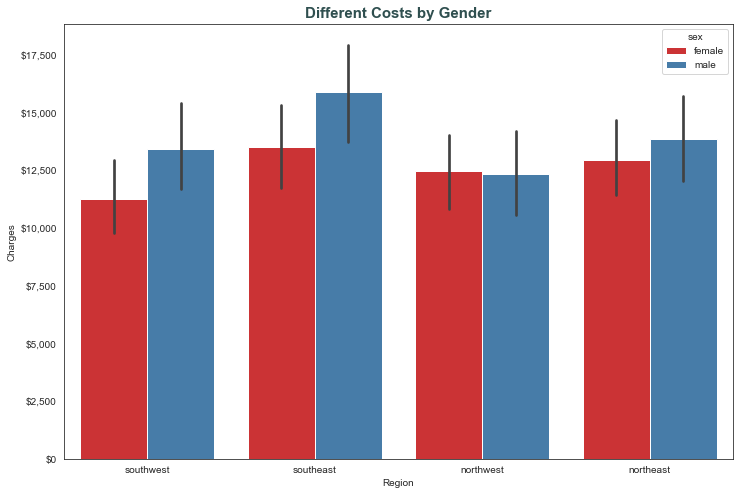

In [44]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(12, 8))
sns.set_palette('Set1')
sns.set_style('white')
sns.barplot(data=df, x='region', y = 'charges', hue = 'sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Different Costs by Gender', fontweight = 'bold', fontsize = '15', color = 'darkslategrey')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

In [8]:
with_child = df[df['children'] >= 1]
without_child = df[df['children'] < 1]
len(with_child)
with_child['age'].mean()

39.78010471204188

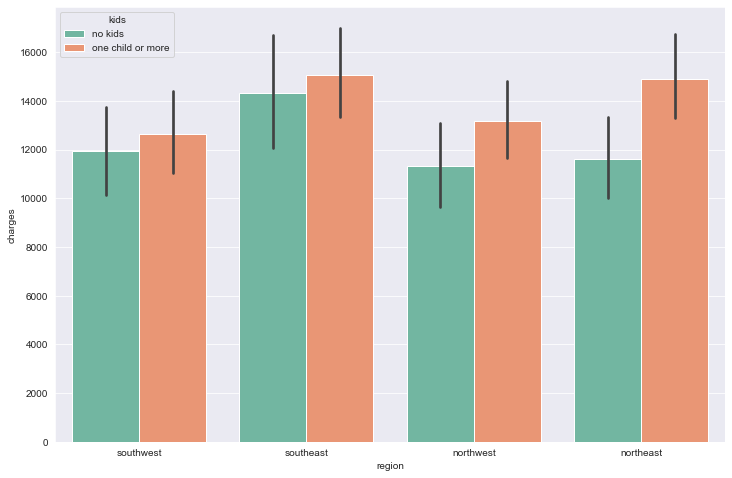

In [23]:
df['kids'] = df['children'].apply(lambda x: 'no kids' if x == 0 else 'one child or more' )
plt.figure(figsize = (12,8))

sns.set_palette('Set2')
sns.set_style('darkgrid')
sns.barplot(data = df, x = 'region', y = 'charges', hue = 'kids')


Finding out amount of owerweight patients:

Text(0.5, 1.0, 'Patients Weight')

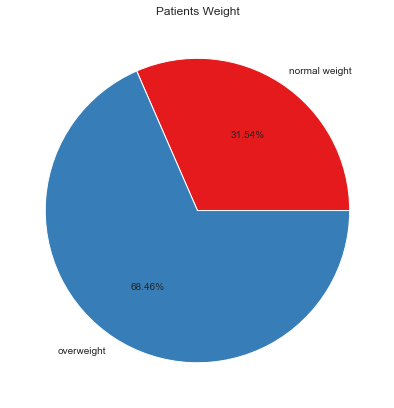

In [81]:
df['weight'] = df['bmi'].apply(lambda x: 'overweight' if x >= 27.6 else 'normal weight')
weights = (len(df[df['weight'] == 'normal weight']), len(df[df['weight'] == 'overweight']))
plt.figure(figsize = (7, 7))
plt.pie(weights, autopct = '%0.2f%%', labels = ['normal weight', 'overweight'])
plt.title('Patients Weight')

Text(0.5, 1.0, 'Level of Obesity')

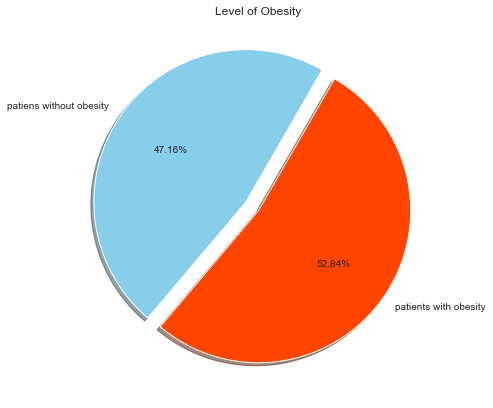

In [82]:
df['obesity'] = df['bmi'].apply(lambda x: 'yes' if x >= 30 else 'no') 
obesity = (len(df[df['obesity'] == 'no']), len(df[df['obesity'] == 'yes']))
plt.figure(figsize = (7, 7))
plt.pie(obesity, autopct = '%0.2f%%', labels = ['patiens without obesity', 'patients with obesity'], startangle = 60,shadow = True,explode = (0.1, 0), colors = ['skyblue', 'orangered'] )
plt.title('Level of Obesity')

(152, 121, 177, 181)
(173, 243, 148, 143)


Text(0.5, 1.0, 'Patients Obesity by Regions')

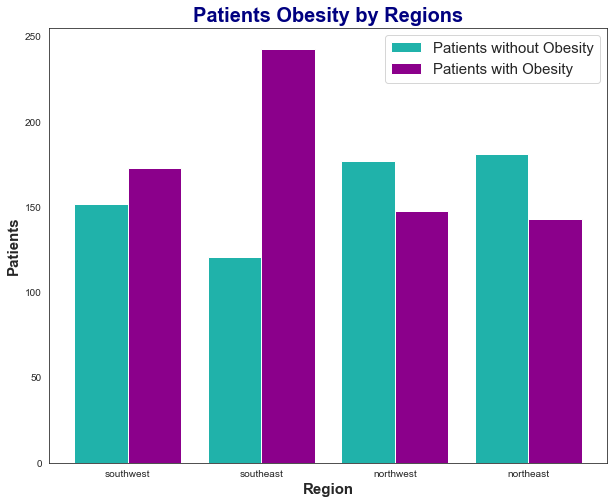

In [78]:
regions_no_obesity = (len(df[(df['region'] == 'southwest') & (df['obesity'] == 'no')]), 
                             len(df[(df['region'] == 'southeast') & (df['obesity'] == 'no')]), 
                             len(df[(df['region'] == 'northwest') & (df['obesity'] == 'no')]), 
                             len(df[(df['region'] == 'northeast') & (df['obesity'] == 'no')]))
print(regions_no_obesity)

regions_with_obesity = (len(df[(df['region'] == 'southwest') & (df['obesity'] == 'yes')]), 
                             len(df[(df['region'] == 'southeast') & (df['obesity'] == 'yes')]), 
                             len(df[(df['region'] == 'northwest') & (df['obesity'] == 'yes')]), 
                             len(df[(df['region'] == 'northeast') & (df['obesity'] == 'yes')]))
print(regions_with_obesity)
regions_labels = ['southwest', 'southeast', 'northwest', 'northeast']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

regions_no_obesity_x = create_x(2, 0.8, 1, 4)
regions_with_obesity_x = create_x(2, 0.8, 2, 4)
plt.figure(figsize = (10, 8))
ax = plt.subplot()
plt.bar(regions_no_obesity_x, regions_no_obesity, color = 'lightseagreen')
plt.bar(regions_with_obesity_x, regions_with_obesity, color = 'darkmagenta')
middle_x = [(a+b)/2 for a,b in zip(regions_no_obesity_x, regions_with_obesity_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(regions_labels)
plt.legend(['Patients without Obesity', 'Patients with Obesity'], fontsize = 15)
plt.xlabel('Region', fontsize = 15,  fontweight = 'bold')
plt.ylabel('Patients', fontsize = 15, fontweight = 'bold')
plt.title('Patients Obesity by Regions', fontsize = 20,  fontweight = 'bold', color = 'navy' )

Lets check dependence charges from bmi

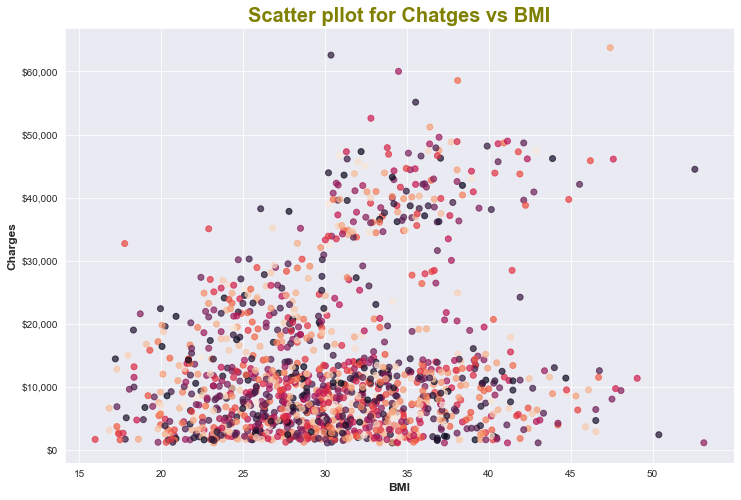

In [25]:
n = len(df)
colors = np.random.rand(n)
f, ax = plt.subplots(figsize = (12, 8))
ax.scatter( df['bmi'], df['charges'],  c = colors, alpha = 0.7)
plt.title('Scatter pllot for Chatges vs BMI', fontsize = 20,  fontweight = 'bold', color = 'olive')
plt.xlabel('BMI', fontsize = 12,  fontweight = 'bold')
plt.ylabel('Charges', fontsize = 12,  fontweight = 'bold')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)